## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## II. Importing and understanding our dataset 

In [2]:
df1 = pd.read_csv("heartdata.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(df1)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
df1.shape

(303, 14)

#### Printing out a few columns

In [5]:
df1.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
df2=pd.read_csv("data.csv")

In [7]:
df2['target'] = df2['target'].replace({1: 0, 2: 1})

In [8]:
df2.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   4       130   322    0        2      109      0      2.4      2   
1   67    0   3       115   564    0        2      160      0      1.6      2   
2   57    1   2       124   261    0        0      141      0      0.3      1   
3   64    1   4       128   263    0        0      105      1      0.2      2   
4   74    0   2       120   269    0        2      121      1      0.2      1   

   ca  thal  target  
0   3     3       1  
1   0     7       0  
2   0     7       1  
3   1     7       0  
4   1     3       0

In [9]:
df2.shape

(270, 14)

In [10]:
df3=pd.read_csv("heart.csv")
df3.head()

age  sex            cp  trestbps  chol  fbs  restecg  thalach  exang  \
0   63    1       typical       145   233    1        2      150      0   
1   67    1  asymptomatic       160   286    0        2      108      1   
2   67    1  asymptomatic       120   229    0        2      129      1   
3   37    1    nonanginal       130   250    0        0      187      0   
4   41    0    nontypical       130   204    0        2      172      0   

   oldpeak  slope  ca        thal  target  
0      2.3      3   0       fixed       0  
1      1.5      2   3      normal       1  
2      2.6      2   2  reversable       1  
3      3.5      3   0      normal       0  
4      1.4      1   0      normal       0

In [11]:
#changing chest oain values to 'typical':0, 'nontypical':1, 'nonanginal':2, 'asymptomatic':3

df3['cp'] = df3['cp'].replace({'typical':0, 'nontypical':1, 'nonanginal':2, 'asymptomatic':3})


In [12]:
df2['cp'] = df2['cp'].replace({1:0, 2:1, 3:2, 4:3})
df1['thal'] = df1['thal'].replace({1:6, 2:3, 3:7})

In [13]:
df3=df3.dropna()
df3['thal'] = df3['thal'].replace({'fixed':6, 'normal':3, 'reversable':7})
df3['thal'] = df3['thal'].astype(int)

In [14]:
df3.shape

(301, 14)

In [15]:
print(df1['thal'].unique(),df2['thal'].unique(),df3['thal'].unique())

[6 3 7 0] [3 7 6] [6 3 7]


In [16]:
dataset = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
dataset.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     6       1  
1   0     3       1  
2   0     3       1  
3   0     3       1  
4   0     3       1

In [17]:
dataset.sample(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
801   66    1   3       112   212    0        2      132      1      0.1   
435   42    1   3       140   226    0        0      178      0      0.0   
15    50    0   2       120   219    0        1      158      0      1.6   
648   65    0   2       160   360    0        2      151      0      0.8   
631   54    1   2       125   273    0        2      152      0      0.5   

     slope  ca  thal  target  
801      1   1     3       1  
435      1   0     3       0  
15       1   0     3       1  
648      1   0     3       0  
631      3   1     3       0

#### Description

In [18]:
dataset.describe()

age         sex          cp    trestbps        chol         fbs  \
count  874.000000  874.000000  874.000000  874.000000  874.000000  874.000000   
mean    54.416476    0.680778    1.749428  131.568650  247.544622    0.147597   
std      9.074996    0.466442    1.135759   17.659448   51.756930    0.354903   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    1.000000  120.000000  212.000000    0.000000   
50%     55.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  874.000000  874.000000  874.000000  874.000000  874.000000  874.000000   
mean     0.839817  149.675057    0.327231    1.044050    1.526316    0.697941   
std      0.891332   22.944420    0.469471    1.155679    0.622134    0.972860   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    4.000000   

             thal      target  
count  874.000000  874.000000  
mean     4.711670    0.483982  
std      1.948754    0.500029  
min      0.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       874 non-null    int64  
 1   sex       874 non-null    int64  
 2   cp        874 non-null    int64  
 3   trestbps  874 non-null    int64  
 4   chol      874 non-null    int64  
 5   fbs       874 non-null    int64  
 6   restecg   874 non-null    int64  
 7   thalach   874 non-null    int64  
 8   exang     874 non-null    int64  
 9   oldpeak   874 non-null    float64
 10  slope     874 non-null    int64  
 11  ca        874 non-null    int64  
 12  thal      874 non-null    int64  
 13  target    874 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 95.7 KB


In [20]:
#pip install pandas-profiling

In [21]:
import pandas_profiling
pandas_profiling.ProfileReport(dataset)

C:\Users\Shaik Farhathulla\AppData\Local\Temp\ipykernel_724\2114818034.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Let's understand our columns better:

In [22]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [23]:
dataset["target"].describe()

count    874.000000
mean       0.483982
std        0.500029
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [24]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [25]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
slope       0.321707
cp          0.318668
thal        0.158653
ca          0.147809
restecg     0.135592
thalach     0.129949
exang       0.124825
oldpeak     0.123823
sex         0.088554
age         0.064075
trestbps    0.050781
chol        0.034684
fbs         0.009254
Name: target, dtype: float64


In [26]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    451
1    423
Name: target, dtype: int64


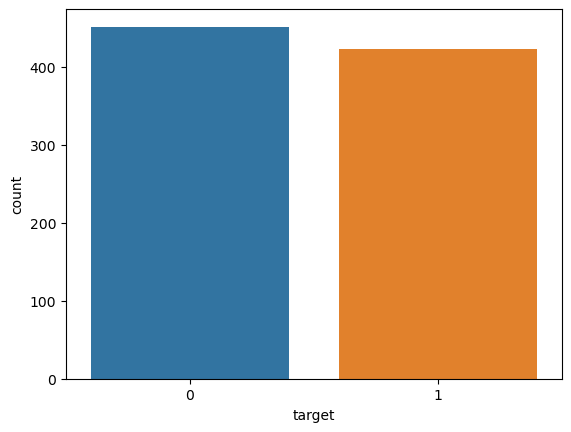

In [27]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [28]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/874,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/874,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 51.6
Percentage of patience with heart problems: 48.4


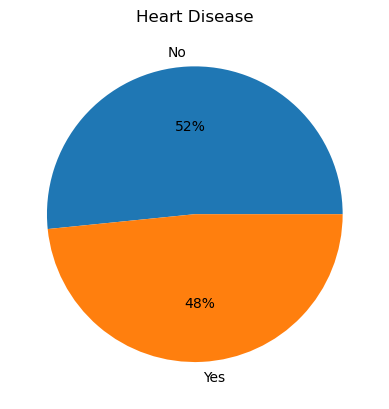

In [29]:
labels = ['No', 'Yes']
values = dataset['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Age' feature

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


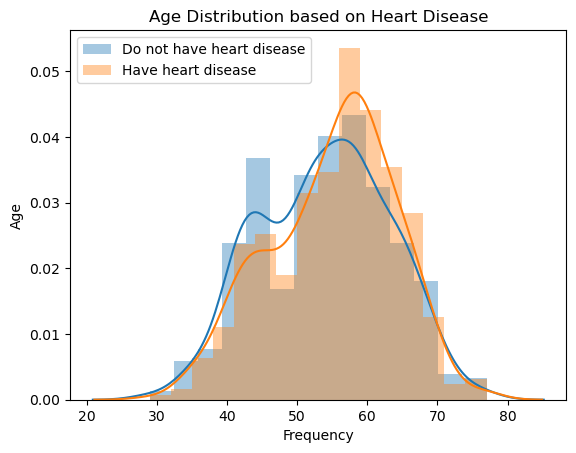

In [30]:
# Display age distribution based on heart disease
sns.distplot(dataset[dataset['target'] == 0]['age'], label='Do not have heart disease')
sns.distplot(dataset[dataset['target'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

### Analysing the 'Sex' feature

In [31]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

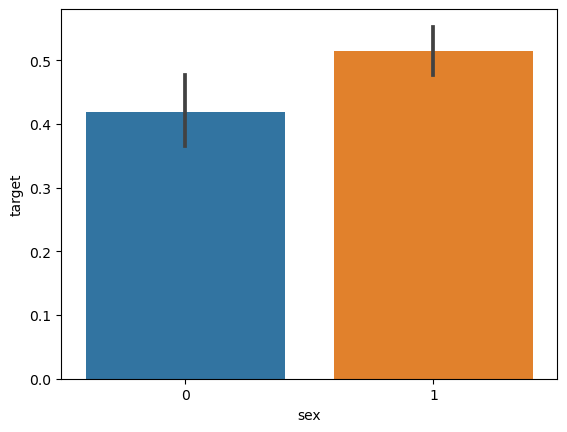

In [32]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [33]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

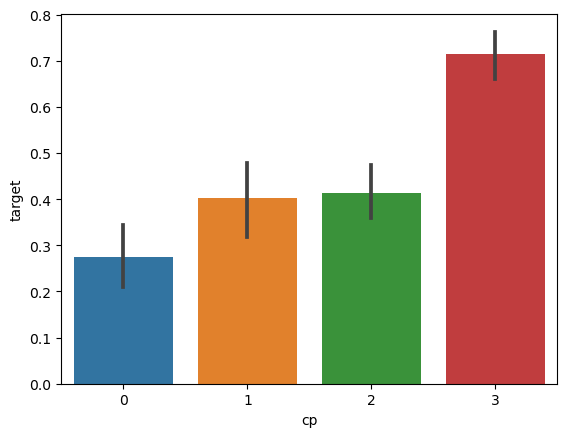

In [34]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the 'Blood Pressure Exploration' feature

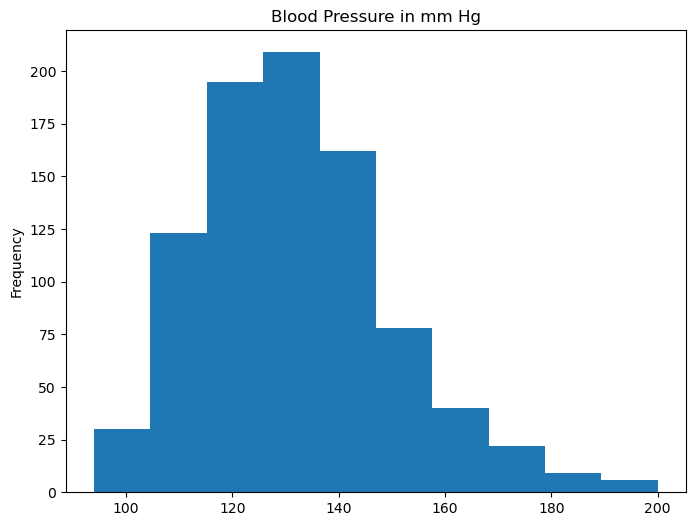

In [35]:
# Display blood pressure distribution
dataset['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


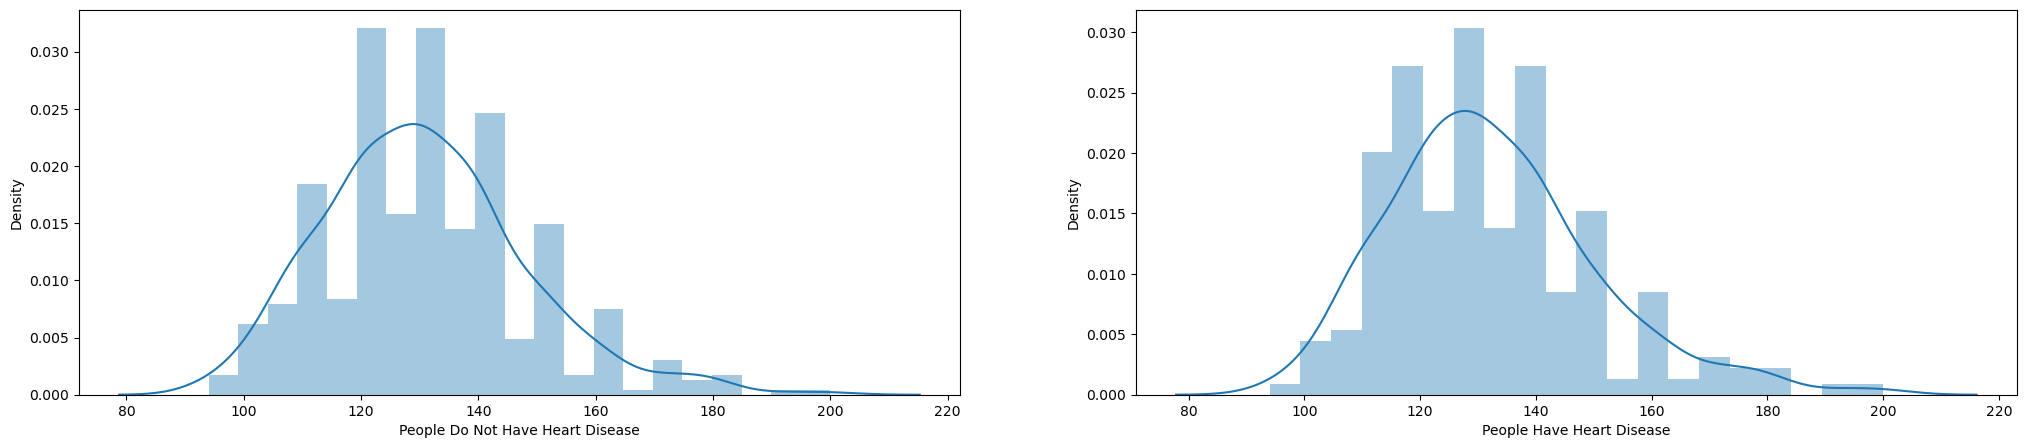

In [36]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(dataset[dataset['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [37]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(dataset[dataset['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(dataset[dataset['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', dataset[dataset['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  130.70066518847005


In [38]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(dataset[dataset['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(dataset[dataset['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', dataset[dataset['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  132.49408983451536


### Analysing the Cholestoral Exploration feature

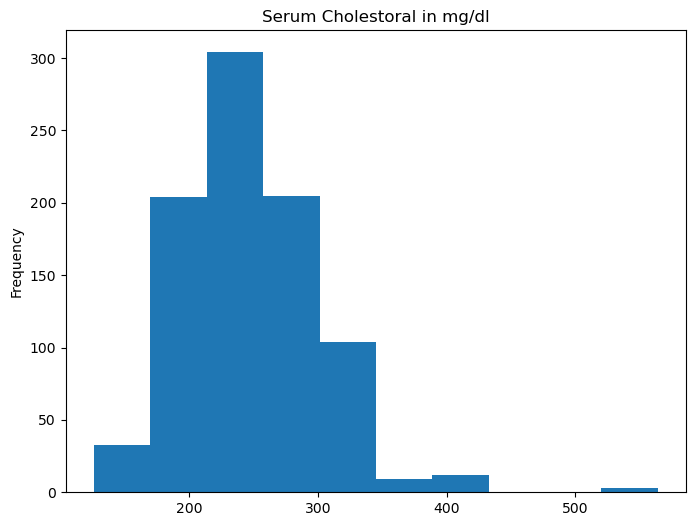

In [39]:
dataset['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


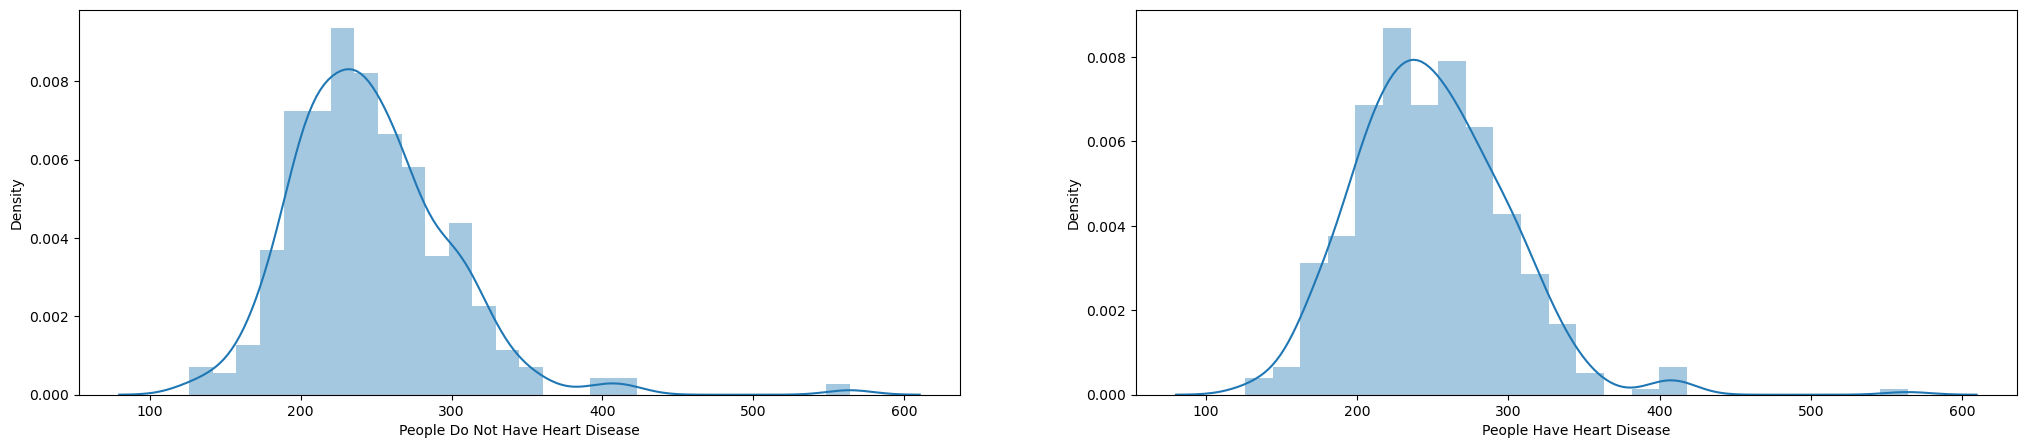

In [40]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(dataset[dataset['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [41]:
print('Min cholestoral of people who do not have heart disease: ', min(dataset[dataset['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(dataset[dataset['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', dataset[dataset['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  245.80709534368071


In [42]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(dataset[dataset['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(dataset[dataset['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', dataset[dataset['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  249.39716312056737


### Analysing the FBS feature

In [43]:
dataset["fbs"].describe()

count    874.000000
mean       0.147597
std        0.354903
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [44]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

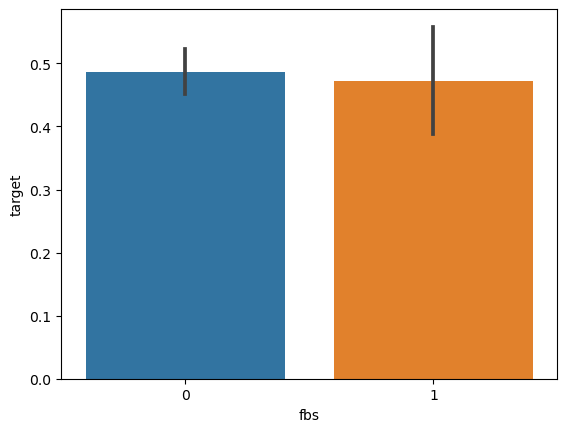

In [45]:
sns.barplot(dataset["fbs"],y)

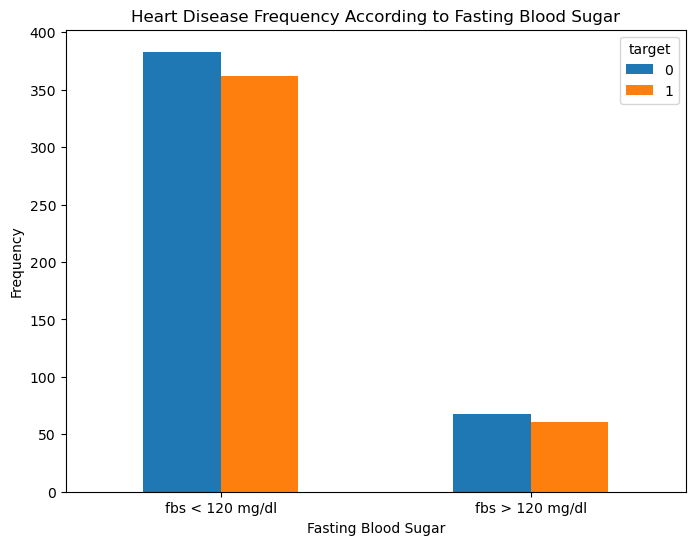

In [46]:
# Display fasting blood sugar based on the target
pd.crosstab(dataset.fbs,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

##### Nothing extraordinary here

### Analysing the restecg feature

In [47]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

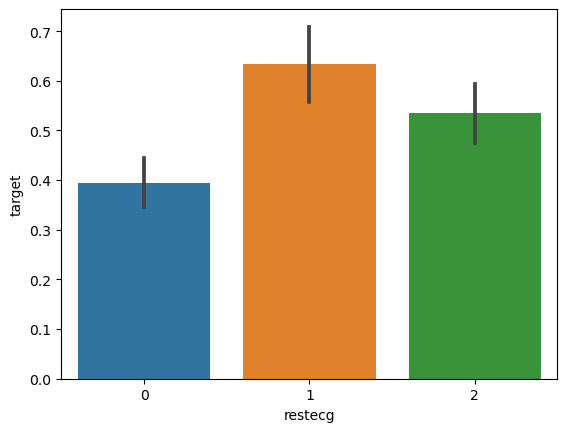

In [48]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [49]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

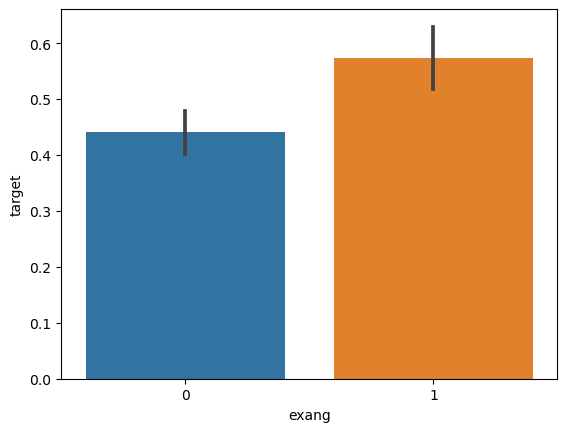

In [50]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [51]:
dataset["slope"].unique()

array([0, 2, 1, 3], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

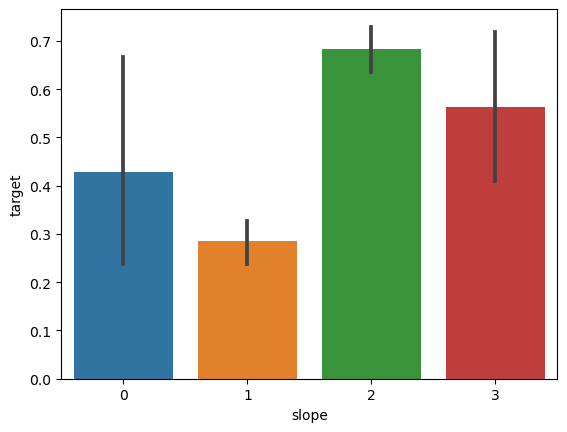

In [52]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [53]:
#number of major vessels (0-3) colored by flourosopy

In [54]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

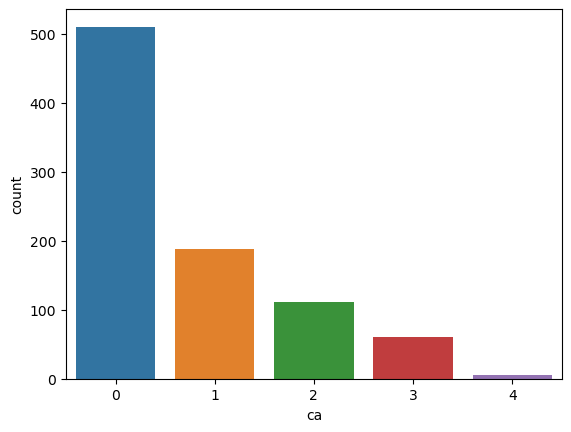

In [55]:
sns.countplot(dataset["ca"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

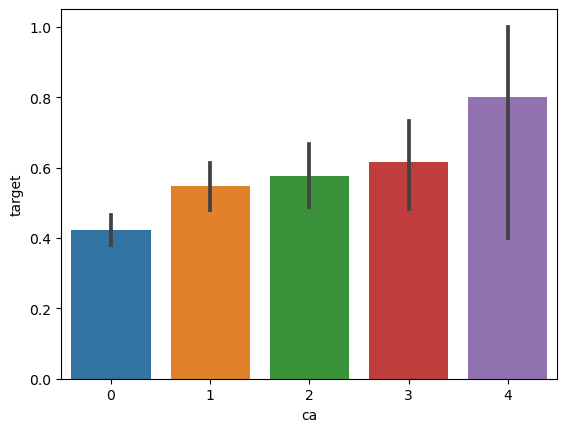

In [56]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

### Analysing the 'thal' feature

In [57]:
dataset["thal"].unique()

array([6, 3, 7, 0], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

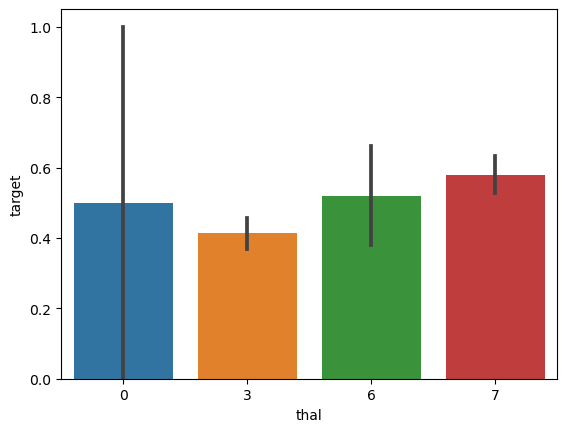

In [58]:
sns.barplot(dataset["thal"],y)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='Density'>

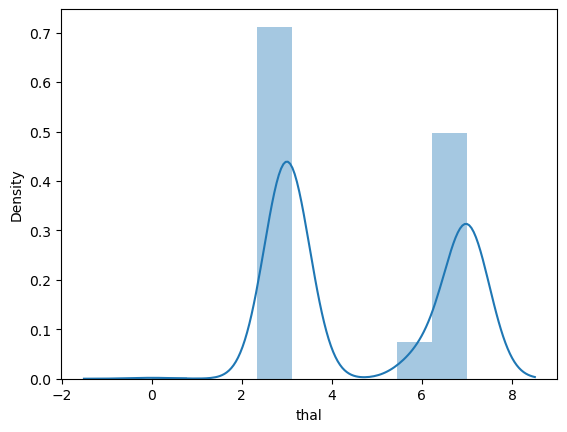

In [59]:
sns.distplot(dataset["thal"])

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


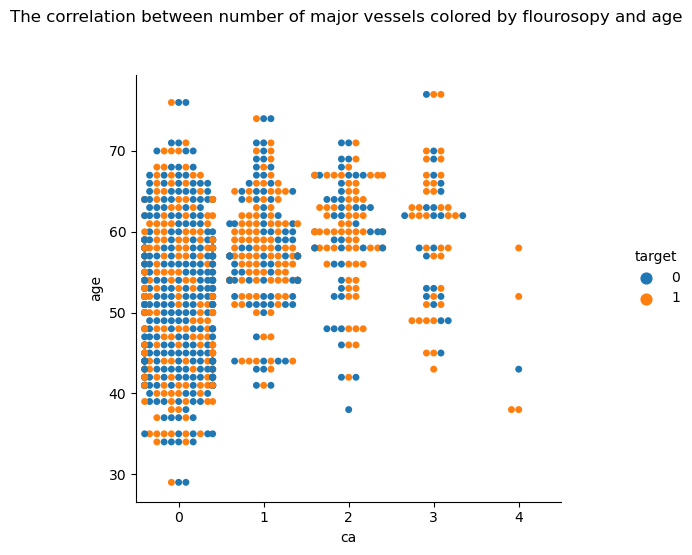

In [60]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = dataset, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

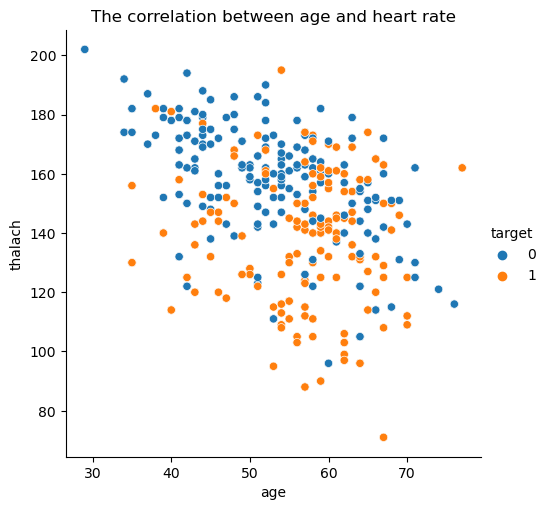

In [61]:
#The correlation between age and thalach

sns.relplot(x = 'age', y = 'thalach', data = dataset, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

## IV. Train Test split

In [62]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [63]:
X_train.shape

(699, 13)

In [64]:
X_test.shape

(175, 13)

In [65]:
Y_train.shape

(699,)

In [66]:
Y_test.shape

(175,)

## V. Model Fitting

In [67]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
Y_pred_lr.shape

(175,)

In [70]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 73.71 %


In [71]:
plr = round(precision_score(Y_test,Y_pred_lr)*100,2)
print(classification_report(Y_test,Y_pred_lr))


              precision    recall  f1-score   support

           0       0.72      0.77      0.75        88
           1       0.75      0.70      0.73        87

    accuracy                           0.74       175
   macro avg       0.74      0.74      0.74       175
weighted avg       0.74      0.74      0.74       175



### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [73]:
Y_pred_nb.shape

(175,)

In [74]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 68.57 %


In [75]:
#printing classification report of algorithm

pnb = round(precision_score(Y_test,Y_pred_nb)*100,2)
print(classification_report(Y_test,Y_pred_nb))


              precision    recall  f1-score   support

           0       0.67      0.73      0.70        88
           1       0.70      0.64      0.67        87

    accuracy                           0.69       175
   macro avg       0.69      0.69      0.69       175
weighted avg       0.69      0.69      0.69       175



### SVM

In [76]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [77]:
Y_pred_svm.shape

(175,)

In [78]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 68.0 %


In [79]:
#printing classification report of algorithm

psvm = round(precision_score(Y_test,Y_pred_svm)*100,2)
print(classification_report(Y_test,Y_pred_svm))


              precision    recall  f1-score   support

           0       0.67      0.73      0.70        88
           1       0.70      0.63      0.66        87

    accuracy                           0.68       175
   macro avg       0.68      0.68      0.68       175
weighted avg       0.68      0.68      0.68       175



### K Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
Y_pred_knn.shape

(175,)

In [82]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 46.29 %


In [83]:
#printing classification report of algorithm

pknn = round(precision_score(Y_test,Y_pred_knn)*100,2)
print(classification_report(Y_test,Y_pred_knn))


              precision    recall  f1-score   support

           0       0.47      0.50      0.48        88
           1       0.46      0.43      0.44        87

    accuracy                           0.46       175
   macro avg       0.46      0.46      0.46       175
weighted avg       0.46      0.46      0.46       175



### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [85]:
print(Y_pred_dt.shape)

(175,)


In [86]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 85.14 %


In [87]:
#printing classification report of algorithm

pdt = round(precision_score(Y_test,Y_pred_dt)*100,2)
print(classification_report(Y_test,Y_pred_dt))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85        88
           1       0.84      0.86      0.85        87

    accuracy                           0.85       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.85      0.85      0.85       175



### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(4000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [89]:
Y_pred_rf.shape

(175,)

In [90]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.29 %


In [91]:
#printing classification report of algorithm

prf = round(precision_score(Y_test,Y_pred_rf)*100,2)
print(classification_report(Y_test,Y_pred_rf))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91        88
           1       0.93      0.87      0.90        87

    accuracy                           0.90       175
   macro avg       0.90      0.90      0.90       175
weighted avg       0.90      0.90      0.90       175



In [92]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(Y_test, Y_pred_rf)
print("recall score for class 1:", recall[1])
print("recall score for class 0:", recall[0])

recall score for class 1: 0.8735632183908046
recall score for class 0: 0.9318181818181818


In [93]:
confusion_matrix(Y_test, Y_pred_rf)

array([[82,  6],
       [11, 76]], dtype=int64)

### XGBoost

In [94]:
#pip install xgboost

In [95]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [96]:
Y_pred_xgb.shape

(175,)

In [97]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 86.29 %


In [98]:
#printing classification report of algorithm

pxgb = round(precision_score(Y_test,Y_pred_xgb)*100,2)
print(classification_report(Y_test,Y_pred_xgb))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87        88
           1       0.87      0.85      0.86        87

    accuracy                           0.86       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.86      0.86      0.86       175



### Neural Network

In [99]:
#pip install tensorflow

In [100]:
from keras.models import Sequential
from keras.layers import Dense

In [137]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=13))
model.add(Dense(11,activation='sigmoid',input_dim=13))
model.add(Dense(11,activation='sigmoid',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [138]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
22/22 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5193
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5193
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5193
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5193
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5193
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5193
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5193
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5193
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5193
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5193
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6037
Epoch 84/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6066
Epoch 85/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6123
Epoch 86/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6137
Epoch 87/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6037
Epoch 88/300
22/22 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6052
Epoch 89/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6066
Epoch 90/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5923
Epoch 91/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6180
Epoch 92/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6123
Epoch 93/300


22/22 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6567
Epoch 165/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6595
Epoch 166/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6567
Epoch 167/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6638
Epoch 168/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.6595
Epoch 169/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.6567
Epoch 170/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6595
Epoch 171/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.6595
Epoch 172/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.6609
Epoch 173/300
22/22 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.6595
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.6781
Epoch 246/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.6824
Epoch 247/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.6795
Epoch 248/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.6896
Epoch 249/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.6867
Epoch 250/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.6824
Epoch 251/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.6910
Epoch 252/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.6896
Epoch 253/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.6853
Epoch 254/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7010
Epoc

In [139]:
Y_pred_nn = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [140]:
Y_pred_nn.shape

(175, 1)

In [141]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [142]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 73.71 %


In [143]:
#printing classification report of algorithm

pnn = round(precision_score(Y_test,Y_pred_nn)*100,2)
print(classification_report(Y_test,Y_pred_nn))


              precision    recall  f1-score   support

           0       0.68      0.90      0.77        88
           1       0.85      0.57      0.68        87

    accuracy                           0.74       175
   macro avg       0.76      0.74      0.73       175
weighted avg       0.76      0.74      0.73       175



## VI. Output final score

In [144]:
scores = [score_lr,score_nb,score_svm,score_knn,score_nn,score_xgb,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","SVM","KNN","Neural Network","XGBoost","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 73.71 %
The accuracy score achieved using Naive Bayes is: 68.57 %
The accuracy score achieved using SVM is: 68.0 %
The accuracy score achieved using KNN is: 46.29 %
The accuracy score achieved using Neural Network is: 73.71 %
The accuracy score achieved using XGBoost is: 86.29 %
The accuracy score achieved using Decision Tree is: 85.14 %
The accuracy score achieved using Random Forest is: 90.29 %


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

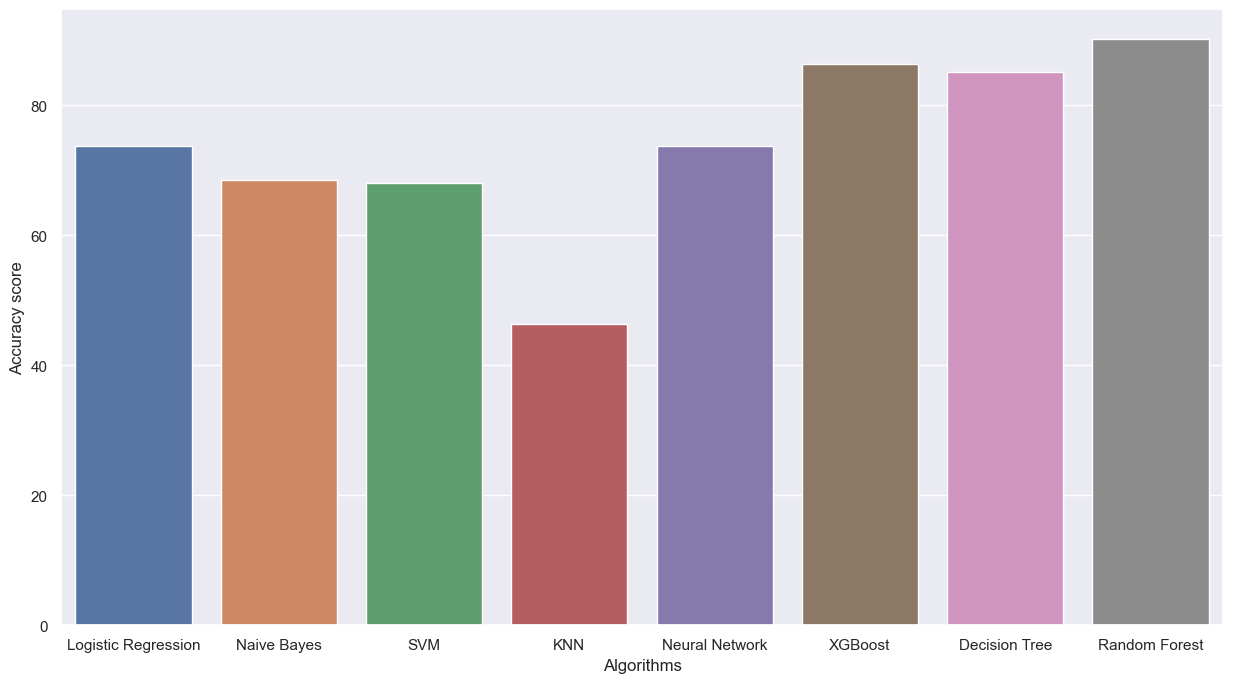

In [145]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [146]:
pscores = [plr,pnb,psvm,pknn,pnn,pxgb,pdt,prf]
algorithms = ["Logistic Regression","Naive Bayes","SVM","KNN","Neural Network","XGBoost","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The precision score achieved using "+algorithms[i]+" is: "+str(pscores[i])+" %")

The precision score achieved using Logistic Regression is: 75.31 %
The precision score achieved using Naive Bayes is: 70.0 %
The precision score achieved using SVM is: 69.62 %
The precision score achieved using KNN is: 45.68 %
The precision score achieved using Neural Network is: 84.75 %
The precision score achieved using XGBoost is: 87.06 %
The precision score achieved using Decision Tree is: 84.27 %
The precision score achieved using Random Forest is: 92.68 %


Feature: age, Score: 0.09752
Feature: sex, Score: 0.02835
Feature: cp, Score: 0.11184
Feature: trestbps, Score: 0.09961
Feature: chol, Score: 0.11339
Feature: fbs, Score: 0.01210
Feature: restecg, Score: 0.07754
Feature: thalach, Score: 0.12585
Feature: exang, Score: 0.02227
Feature: oldpeak, Score: 0.09055
Feature: slope, Score: 0.12483
Feature: ca, Score: 0.05073
Feature: thal, Score: 0.04542


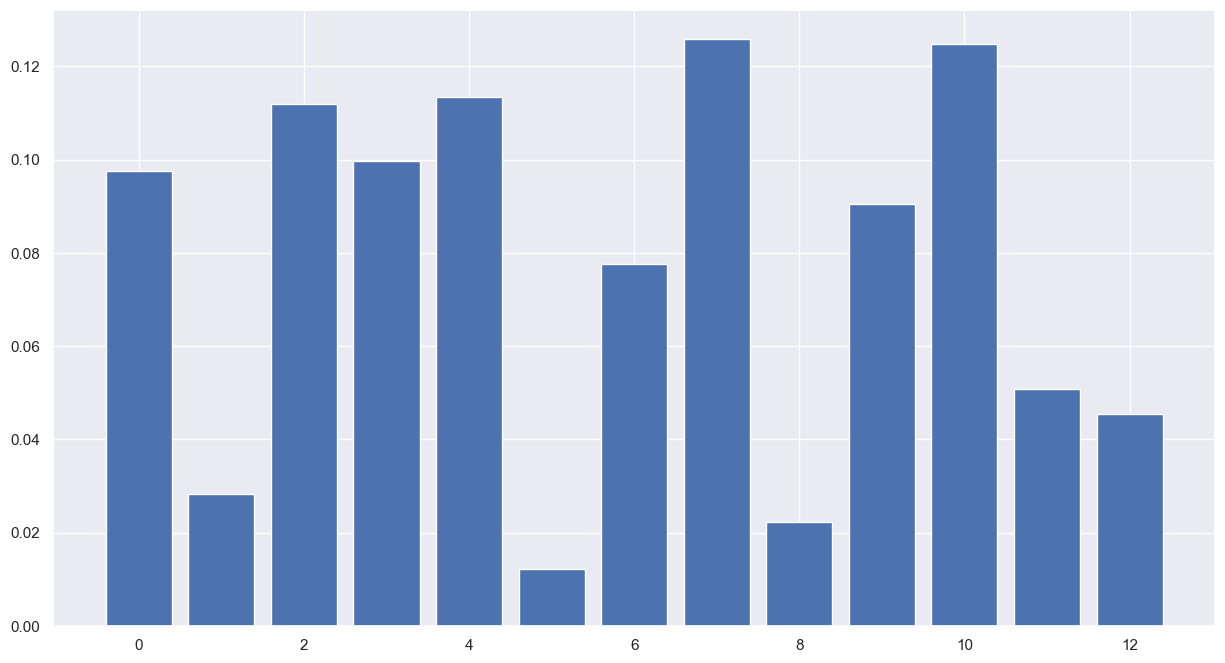

In [147]:
features = dataset
features = features.drop(['target'], axis = 1)
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()